In [1]:
import pandas as pd
import datetime
from datetime import date
from datetime import datetime
import numpy as np

In [12]:
from tqdm.notebook import tqdm

### Data clean

In [6]:
# def strip(string):
#   return string.strip()
# strip = lambda x: x.strip()

def data_clean(df):
    # delete rows with any column having NaN value, just keeping data about OBD
    df.dropna(axis=0, how='any', inplace=True)
    print("after deleting NaN size=", df.shape)
    
    new=df[df['V_ONBOARD'] == 'Y']
    print("filter by keeping onboard eaqul to Y =", new.shape)
    
    # delete blank four characters for each VIN
    new['V_VIN'] = new['V_VIN'].map(lambda x: x.strip())
    
    # Sort by test date
    new.sort_values(by=['V_DATE_TIME'], inplace=True)
    
    # Just keep VIN appearing times less or equal to 24, VIN length is 17 and without special characters
    dict_VIN=new['V_VIN'].value_counts().to_dict()
    lst=[]
    for key in dict_VIN:
        if dict_VIN[key]<=24 and len(key)==17 and key.isalnum():
            lst.append(key)
    
    # create a new df after cleaning
    s = set(lst)
    # print("s size=", len(s))
    new = new[new.V_VIN.isin(s)]
    return new 

### create one year dict 

In [7]:
def df_dict(df):
    dt_df = df['V_DATE_TIME'].groupby(df['V_VIN']).agg(lambda x: list(x))
    dr_df = df['V_OBD_RES'].groupby(df['V_VIN']).agg(lambda x: list(x))
    dt_df.to_dict()
    dr_df.to_dict()
    merge_dict = {key: list(zip(dt_df[key], dr_df[key])) for key in dt_df.keys()}
    return merge_dict

### Just keep the first test

In [8]:
def first_test_dict(d):
    one_year_dict={}
    for key in d:
        one_year_dict[key]=[d[key][0]]
    return one_year_dict   

### Add one year dict to global dict

In [9]:
# global dict
global_dict1={}

In [10]:
def add_global(d):
    for key in d:
        if key not in global_dict1:
            global_dict1[key]=d[key]
        else:
            global_dict1[key].extend(d[key]) 
    return global_dict1

### Data Read in

In [13]:
for year in tqdm(range(2010, 2018)):
    df = pd.read_table('VTR{}.txt'.format(year), sep=',',usecols=['V_VIN','V_DATE_TIME','V_OBD_RES','V_ONBOARD'])
    print("before size=", df.shape)
    df = data_clean(df)
    print("after size=", df.shape)
    merge_dict = df_dict(df)
    first_test_d = first_test_dict(merge_dict)
    global_dict1 = add_global(first_test_d)

before size= (966143, 4)
after deleting NaN size= (966143, 4)
filter by keeping onboard eaqul to Y = (610236, 4)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


after size= (608254, 4)
before size= (1173294, 4)
after deleting NaN size= (1173160, 4)
filter by keeping onboard eaqul to Y = (778500, 4)
after size= (777699, 4)
before size= (1212143, 4)
after deleting NaN size= (1212088, 4)
filter by keeping onboard eaqul to Y = (835744, 4)
after size= (834373, 4)
before size= (1288068, 4)
after deleting NaN size= (1288068, 4)
filter by keeping onboard eaqul to Y = (911032, 4)
after size= (910073, 4)
before size= (1264854, 4)
after deleting NaN size= (1264854, 4)
filter by keeping onboard eaqul to Y = (921582, 4)
after size= (920218, 4)
before size= (1149081, 4)
after deleting NaN size= (1148860, 4)
filter by keeping onboard eaqul to Y = (849360, 4)
after size= (848380, 4)
before size= (1140729, 4)
after deleting NaN size= (1140729, 4)
filter by keeping onboard eaqul to Y = (877301, 4)
after size= (876464, 4)
before size= (1129504, 4)
after deleting NaN size= (1129504, 4)
filter by keeping onboard eaqul to Y = (884611, 4)
after size= (883076, 4)



In [190]:
data = {'Year':[2010,2011,2012,2013,2014,2015,2016,2017],
       'Original size':[966143,1173294,1212143,1288068,1264854,1149081,1140729,1129504],
       'After deleting NaN size':[966143,1173160,1212088,1288068,1264854,1148860,1140729,1129504],
       'filter by keeping onboard eaqul to Y':[610236,778500,835744,911032,921582,849360,877301,884611],
        '24 times a year & VIN length 17 & no special character':[608254,777699,834373,910073,920218,848380,876464,883076]
       }
df = pd.DataFrame(data)

In [196]:
df['reduced data1'] = df['Original size'] - df['After deleting NaN size']

In [197]:
df['reduced data2'] = df['After deleting NaN size'] - df['filter by keeping onboard eaqul to Y']

In [198]:
df['reduced data3'] = df['filter by keeping onboard eaqul to Y'] - df['24 times a year & VIN length 17 & no special character']

In [200]:
df['percentage of 2'] = df['reduced data2'] / df['Original size']

In [201]:
df

,Year,Original size,After deleting NaN size,filter by keeping onboard eaqul to Y,24 times a year & VIN length 17 & no special character,reduced data,reduced data1,reduced data2,reduced data3,percentage of 2
0,2010,966143,966143,610236,608254,0,0,355907,1982,0.368379
1,2011,1173294,1173160,778500,777699,134,134,394660,801,0.336369
2,2012,1212143,1212088,835744,834373,55,55,376344,1371,0.310478
3,2013,1288068,1288068,911032,910073,0,0,377036,959,0.292714
4,2014,1264854,1264854,921582,920218,0,0,343272,1364,0.271393
5,2015,1149081,1148860,849360,848380,221,221,299500,980,0.260643
6,2016,1140729,1140729,877301,876464,0,0,263428,837,0.230930
7,2017,1129504,1129504,884611,883076,0,0,244893,1535,0.216815


In [44]:
global_dict1

{'11111111111111111': [('2010-10-19 11:46:47', 'P'),
  ('2012-03-19 17:47:50', 'F'),
  ('2014-12-05 15:32:13', 'P'),
  ('2015-02-18 15:47:31', 'F')],
 '19UUA5640XA001080': [('2010-01-21 09:13:10', 'P'),
  ('2012-02-07 08:22:02', 'P'),
  ('2014-02-20 17:06:13', 'F'),
  ('2015-01-22 16:09:57', 'P')],
 '19UUA5640XA001922': [('2010-05-03 13:38:20', 'P'),
  ('2012-05-09 09:36:26', 'P'),
  ('2014-03-19 08:12:41', 'P'),
  ('2016-05-26 09:00:40', 'P')],
 '19UUA5640XA006733': [('2010-08-09 11:25:44', 'F'),
  ('2011-05-20 15:31:18', 'F'),
  ('2013-09-24 12:53:23', 'P'),
  ('2015-09-21 08:52:55', 'P'),
  ('2017-03-01 14:16:11', 'P')],
 '19UUA5640XA006943': [('2010-09-24 11:29:30', 'P'),
  ('2012-03-20 11:31:26', 'P'),
  ('2013-10-23 17:04:46', 'P'),
  ('2015-04-24 08:21:25', 'F')],
 '19UUA5640XA010524': [('2010-12-21 15:12:19', 'P')],
 '19UUA5640XA019868': [('2010-05-03 10:19:12', 'P'),
  ('2014-04-24 16:42:03', 'P'),
  ('2016-04-20 14:48:13', 'P')],
 '19UUA5640XA021832': [('2010-12-04 11:08:50',

In [14]:
import pickle
with open("test_first", "wb") as f:
    pickle.dump(global_dict1, f)
    
with open("test_first", "rb") as f:
    global_dict2 = pickle.load(f)

In [2]:
import pickle
with open("test_first", "rb") as f:
    global_dict2 = pickle.load(f)

In [5]:
c = 0
for key in global_dict2:
    c+=len(global_dict2[key])
print(c)

5480113


In [16]:
for key in global_dict2:
    global_dict2[key] = [item for item in global_dict2[key] if item[1] != " "]

In [17]:
time_dict = {}
for key in tqdm(global_dict2):
    l = len(global_dict2[key])
    for i in range(l):
        if i+1 < l:
            date1 = global_dict2[key][i][0]
            date2 = global_dict2[key][i+1][0]
            d1 = datetime.strptime(date1, "%Y-%m-%d %H:%M:%S")
            d2 = datetime.strptime(date2, "%Y-%m-%d %H:%M:%S")
            interval = int((d2 - d1).days/7)
            if key not in time_dict:
                time_dict[key] = [(interval, global_dict2[key][i+1][1])]
            else:
                time_dict[key].append((interval, global_dict2[key][i+1][1]))

In [18]:
time_dict

{'11111111111111111': [(73, 'F'), (141, 'P'), (10, 'F')],
 '19UUA5640XA001080': [(106, 'P'), (106, 'F'), (47, 'P')],
 '19UUA5640XA001922': [(105, 'P'), (96, 'P'), (114, 'P')],
 '19UUA5640XA006733': [(40, 'F'), (122, 'P'), (103, 'P'), (75, 'P')],
 '19UUA5640XA006943': [(77, 'P'), (83, 'P'), (78, 'F')],
 '19UUA5640XA019868': [(207, 'P'), (103, 'P')],
 '19UUA5640XA021832': [(101, 'P'), (28, 'F'), (98, 'F'), (125, 'F')],
 '19UUA5640XA025301': [(104, 'P')],
 '19UUA5640XA027811': [(104, 'P'), (104, 'P'), (103, 'P')],
 '19UUA5640XA033821': [(112, 'P'), (223, 'F'), (40, 'P')],
 '19UUA5640XA051977': [(136, 'P')],
 '19UUA5641XA001508': [(115, 'P')],
 '19UUA5641XA010922': [(103, 'P'), (106, 'P')],
 '19UUA5641XA013173': [(241, 'P'), (38, 'P')],
 '19UUA5641XA015246': [(232, 'P')],
 '19UUA5641XA015411': [(216, 'P')],
 '19UUA5641XA026621': [(294, 'F'), (22, 'P')],
 '19UUA5641XA028546': [(117, 'P'), (88, 'P')],
 '19UUA5641XA033536': [(71, 'P')],
 '19UUA5641XA052331': [(83, 'P'), (101, 'P'), (65, 'P'),

In [19]:
num_1=0
num_2=0
num_3=0
num_4=0
num_5=0
num_6=0
num_7=0
num_8=0
num_9=0
num_10=0
num_110=0
num_12=0
num_13=0
num_14=0

num_11=0
num_22=0
num_33=0
num_44=0
num_55=0
num_66=0
num_77=0
num_88=0
num_99=0
num_101=0
num_111=0
num_121=0
num_131=0
num_141=0

for key in tqdm(time_dict):
    for item in time_dict[key]:
        if item[0] <= 10:
            #print(item)
            num_1+=1
            if item[1] != 'P':
                num_11+=1
        elif 10 < item[0] <=20:
            num_2+=1
            if item[1] != 'P':
                num_22+=1
        elif 20 < item[0] <=30:
            num_3+=1
            if item[1] != 'P':
                num_33+=1
        elif 30 < item[0] <=40:
            num_4+=1
            if item[1] != 'P':
                num_44+=1
        elif 40 < item[0] <=50:
            num_5+=1
            if item[1] != 'P':
                num_55+=1
        elif 50 < item[0] <=60:
            num_6+=1
            if item[1] != 'P':
                num_66+=1        
        elif 60 < item[0] <=70:
            num_7+=1
            if item[1] != 'P':
                num_77+=1
        elif 70 < item[0] <=80:
            num_8+=1
            if item[1] != 'P':
                num_88+=1
        elif 80 < item[0] <=90:
            num_9+=1
            if item[1] != 'P':
                num_99+=1
        elif 90 < item[0] <=100:
            num_10+=1
            if item[1] != 'P':
                num_101+=1
        elif 100 < item[0] <=110:
            num_110+=1
            if item[1] != 'P':
                num_111+=1
        elif 110 < item[0] <=120:
            num_12+=1
            if item[1] != 'P':
                num_121+=1
        elif 120 < item[0] <=130:
            num_13+=1
            if item[1] != 'P':
                num_131+=1
        else:
            num_14+=1
            if item[1] != 'P':
                num_141+=1
            
f1 = num_11/num_1         
f2 = num_22/num_2
f3 = num_33/num_3 
f4 = num_44/num_4 
f5 = num_55/num_5 
f6 = num_66/num_6 
f7 = num_77/num_7
f8 = num_88/num_8
f9 = num_99/num_9
f10 = num_101/num_10
f11 = num_111/num_110
f12 = num_121/num_12
f13 = num_131/num_13
f14 = num_141/num_14



In [204]:
print(num_1+num_2+num_3+num_4+num_5+num_6+num_7+num_8+num_9+num_10+num_110+num_12+num_13+num_14)

3978680


In [41]:
print(num_1+num_2+num_3+num_4+num_5+num_6+num_7+num_8+num_9+num_10+num_110+num_12+num_13+num_14)

2815224


#### PA and CO comparison

In [186]:
# Penn
lst1=[0.436664610322846,0.10855108483912138,0.09873070567138989,0.08920775114883611,0.06406823521747543,0.06286729299554551,0.08677743530290447,0.11386346586646662,0.07376781558126788]
penn=[]
for i in lst1:
    penn.append(round(i,4))
print(penn)
# lowest point: one year 0.0628

[0.4367, 0.1086, 0.0987, 0.0892, 0.0641, 0.0629, 0.0868, 0.1139, 0.0738]


In [20]:
# Colorado
lst=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14]
col=[]
for i in lst:
    col.append(round(i,4))
print(col)
# lowest point: two year 0.1047

[0.1823, 0.1394, 0.1337, 0.1326, 0.1336, 0.138, 0.1394, 0.1388, 0.1378, 0.1101, 0.1045, 0.1571, 0.168, 0.1201]


In [21]:
print(num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_110,num_12,num_13,num_14)

10642 22282 38151 54166 82243 126550 90379 74490 67618 183235 1152031 261948 108704 538560


#### CO distribution Plot

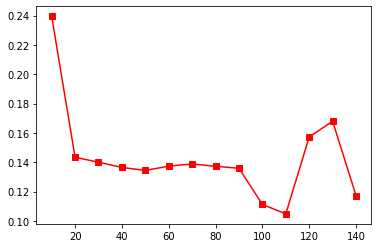

In [206]:
import matplotlib.pyplot as plt
x = [10,20,30,40,50,60,70,80,90,100,110,120,130,140]
y = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14]
plt.plot(x,y,'s-',color = 'r')
plt.show()
#name_list=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','>80']

#plt.bar(range(len(y)), y,fc = 'r')